<a href="https://colab.research.google.com/github/1sh22/Hack_Overflow/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [313]:
import numpy as np #
import matplotlib.pyplot as plt #visualization
import torch
import torch.nn as nn #neural network
import torch.optim as optim #optimizer
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid


## Mounting the Drive

In [314]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting data into Training and Test data

In [315]:
data_path_train = "/content/drive/MyDrive/Covid19-dataset/train"
data_path_test = "/content/drive/MyDrive/Covid19-dataset/test" 

In this code snippet, a series of image transformations are being defined using the transforms.
Compose class from the torchvision.transforms module. These transformations are typically applied to input images before feeding them into a deep learning model for tasks such as training or inference.

In [316]:
img_size = 120

img_transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean = [0.485,0.456,0.475],
                                   std = [0.229,0.224,0.225])  
                                   ])

In this code snippet, the ImageFolder class from the torchvision.datasets module is used to create two datasets: train_data and test_data. The ImageFolder class is a convenient way to load image data from a directory structure where each class has its own subdirectory.



In [317]:
train_data = ImageFolder(root = data_path_train,transform = img_transform)
test_data = ImageFolder(root = data_path_test, transform = img_transform)
len(train_data), len(test_data)

(251, 66)

In [318]:
train_data.class_to_idx

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [319]:
val_data , test_data = random_split(test_data , [50,16])

In [320]:
len(val_data), len(test_data)

(33, 33)

In [321]:
train_loader = DataLoader(train_data,batch_size=16,shuffle=True)
val_loader = DataLoader(val_data,batch_size = 16,shuffle = True)

In [322]:
for img,label in train_loader:
  print(img.shape)
  break

torch.Size([33, 3, 120, 120])


In this code snippet, there is a function named **show_img** that takes a dataset data as input. The purpose of this function is to display a grid of images from the dataset using matplotlib.

In [323]:
def show_img(data):
  for img,label in data:
    plt.figure(figsize=(12,6))
    plt.imshow(make_grid(img,n_rows=5).permute(1,2,0))
    plt.show()
    break

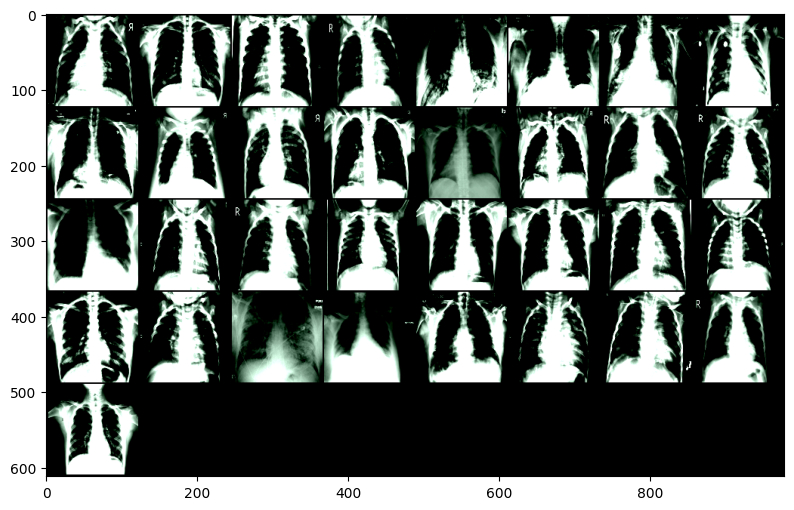

In [324]:
show_img(train_loader)

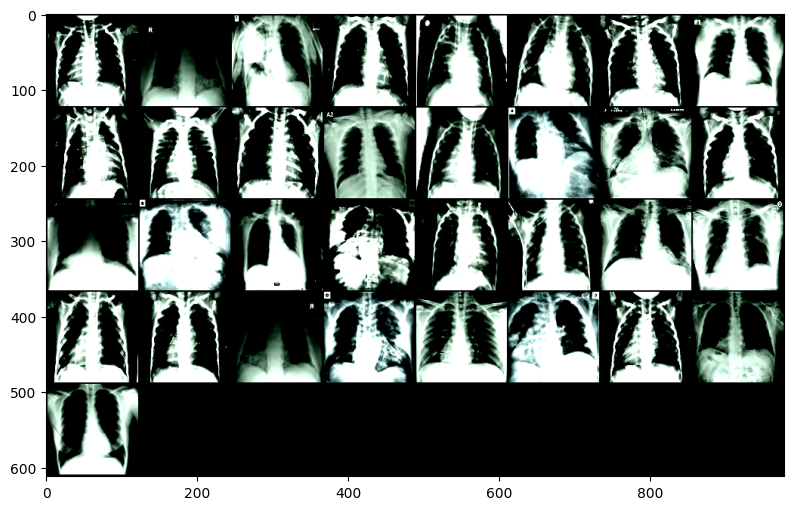

In [325]:
show_img(val_loader)

In this code snippet, a class named ANN is defined as a subclass of **nn.Module**, which is a base class for all neural network modules in PyTorch. This class represents a simple artificial neural network (ANN) model.

In [326]:
class ANN(nn.Module):
  def __init__(self,hidden_layer = 64):
    super(ANN,self).__init__() 

    self.fc1 = nn.Linear(120*120*3,hidden_layer)
    self.fc2 = nn.Linear(hidden_layer,3)

    self.relu = nn.ReLU()

  def forward(self,img):
    out = img.view(-1,120*120*3)
    out = self.fc1(out)
    out = self.relu(out)
    out = self.fc2(out)

    return out

In [327]:
model = ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fc1): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)>


the code snippet sets up the loss function (CrossEntropyLoss) and optimizer (SGD) to be used during the training process. The loss function is responsible for calculating the loss between the model's predictions and the true labels, while the optimizer is responsible for updating the model's parameters based on the calculated gradients and the specified learning rate.

In [328]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

This code snippet represents a training loop for a neural network model using PyTorch. It performs training and validation on the provided datasets for a specified number of epochs. 

In [329]:
def train(model, loss_fn, optimizer):
    epochs = 15
    training_loss = []
    training_acc = []
    validation_loss = []
    validation_acc = []

    for epoch in range(epochs):
        train_loss = 0.0
        train_acc = 0.0
        model.train()

        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            loss.backward()  # calculate gradient
            optimizer.step() 
            predictions = torch.argmax(output, 1)
            train_acc += (predictions == labels).sum().item()
            train_loss += loss.item()

        training_acc.append(train_acc / len(train_data))
        training_loss.append(train_loss / len(train_loader))

        val_loss = 0.0
        val_acc = 0.0

        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = loss_fn(output, labels)
                predictions = torch.argmax(output, 1)
                val_acc += (predictions == labels).sum().item()
                val_loss += loss.item()

        validation_loss.append(val_loss / len(val_loader))
        validation_acc.append(val_acc / len(val_data))

        print("Epochs {}, Training Acc {:.2f}, Training Loss {:.2f}, Validation Acc {:.2f}, Validation Loss {:.2f}".format(
            epoch + 1, train_acc / len(train_data), train_loss / len(train_loader), val_acc / len(val_data),
            val_loss / len(val_loader)
        ))

    plt.plot(range(epochs), training_acc, label="Training Accuracy")
    plt.plot(range(epochs), validation_acc, label="Validation Accuracy")
    plt.title("Accuracy vs Epoch")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Training/Validation Accuracy")
    plt.show()

    plt.plot(range(epochs), training_loss, label="Training Loss")
    plt.plot(range(epochs), validation_loss, label="Validation Loss")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Training/Validation Loss")
    plt.show()


Epochs 1, Training Acc 0.79, Training Loss 0.55, Validation Acc 0.66, Validation Loss 0.46
Epochs 2, Training Acc 0.90, Training Loss 0.32, Validation Acc 0.84, Validation Loss 0.42
Epochs 3, Training Acc 0.89, Training Loss 0.27, Validation Acc 0.80, Validation Loss 0.40
Epochs 4, Training Acc 0.90, Training Loss 0.26, Validation Acc 0.82, Validation Loss 0.40
Epochs 5, Training Acc 0.94, Training Loss 0.20, Validation Acc 0.68, Validation Loss 0.72
Epochs 6, Training Acc 0.93, Training Loss 0.20, Validation Acc 0.78, Validation Loss 0.45
Epochs 7, Training Acc 0.92, Training Loss 0.19, Validation Acc 0.90, Validation Loss 0.25
Epochs 8, Training Acc 0.94, Training Loss 0.17, Validation Acc 0.92, Validation Loss 0.25
Epochs 9, Training Acc 0.96, Training Loss 0.16, Validation Acc 0.94, Validation Loss 0.21
Epochs 10, Training Acc 0.95, Training Loss 0.14, Validation Acc 0.92, Validation Loss 0.19
Epochs 11, Training Acc 0.97, Training Loss 0.12, Validation Acc 0.94, Validation Loss 0.

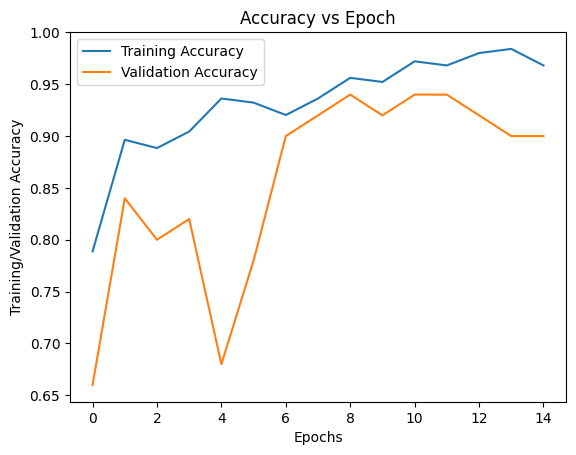

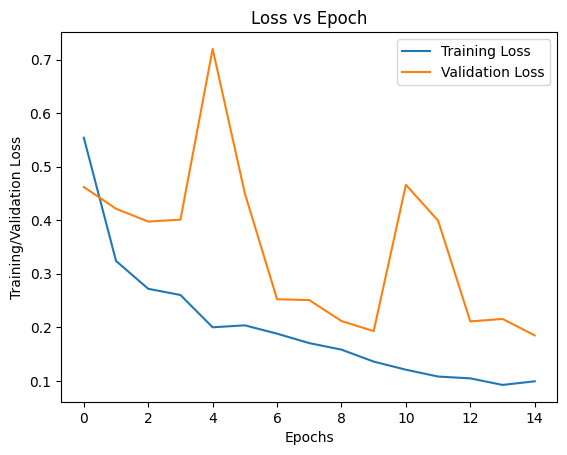

In [308]:
train(model, loss_fn, optimizer)


This code defines a function named predict_img that takes an image tensor (img) and a trained model as input. The function performs inference on the image using the model and returns the predicted class label.

In [309]:
def predict_img(img,model): #last cell
  x = img.unsqueeze(0)
  y = model(x)
  pred = torch.argmax(y,dim=1)
  return train_data.classes[pred]
                  


This code snippet demonstrates the prediction of a single image using a trained model and compares the predicted label with the actual label.

Actual label : Normal Prediction label : Normal


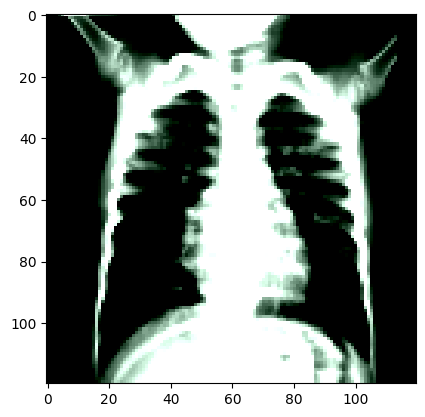

In [310]:
img , label= test_data[2]
plt.imshow(img.permute(1,2,0))
print("Actual label :", train_data.classes[label], "Prediction label :", predict_img(img,model))

Actual label : Normal Prediction label : Normal


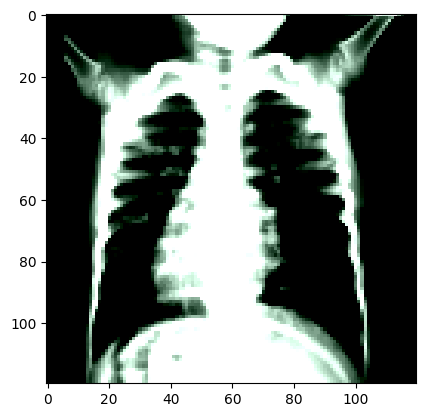

In [311]:
img , label= test_data[2]
plt.imshow(img.permute(1,2,0))
print("Actual label :", train_data.classes[label], "Prediction label :", predict_img(img,model))

Actual label : Covid Prediction label : Covid


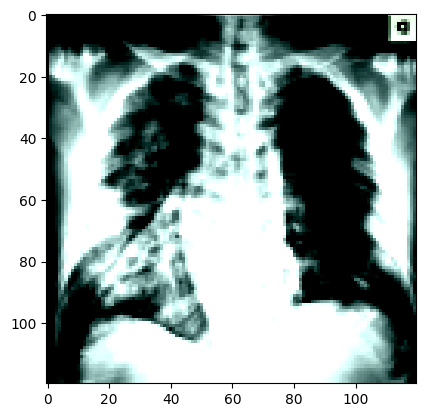

In [312]:
img , label= test_data[9]
plt.imshow(img.permute(1,2,0))
print("Actual label :", train_data.classes[label], "Prediction label :", predict_img(img,model))